# Processing of the results

First some imports

In [15]:
import os

from gravann.input import csv_reader
from gravann.functions import unit_conversion

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Result Consolidation
Next, we read all finalized CSV files from the given input directories and concatenate them into one DataFrame:

In [16]:
# Some variables used over the whole notebook
sample = "eros"
output_directory = Path(f"./results/{sample}")
error_of_interest = "relRMSE"

df = csv_reader.read_result_csv(
    [
        Path(f"./results/{sample}/re-validation"),
        Path(f"./results/{sample}/polyhedral-total-eros-adaptive-noise-2"),
        Path(f"./results/{sample}/polyhedral-total-eros-adaptive-noise-3"),
        Path(f"./results/{sample}/polyhedral-total-eros-adaptive-noise-4"),
        Path(f"./results/{sample}/pretrain"),
        Path(f"./results/{sample}/posttrain")
    ],
    include=["validation_final_result.csv", "results.csv"],
    exclude=["validation_results.csv"]
)
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,pretrained_model,resolution,validation_batch_size
0,eros,results/polyhedral-total-eros-seed-99,26,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.163550,4.699235,1.222578,1.813030,1.214743,5.718293,1.258933,NaN,NaN,NaN
1,eros,results/polyhedral-total-eros-seed-99,31,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.958881,4.464620,1.140942,0.809306,0.558336,2.972985,0.698491,NaN,NaN,NaN
2,eros,results/polyhedral-total-eros-seed-99,18,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.004296,0.021454,0.005370,0.023616,0.015246,0.164545,0.034054,NaN,NaN,NaN
3,eros,results/polyhedral-total-eros-seed-99,29,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.028557,4.604361,1.191101,0.881923,0.607330,3.190247,0.745135,NaN,NaN,NaN
4,eros,results/polyhedral-total-eros-seed-99,34,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.953286,4.397669,1.136690,0.979574,0.675245,3.457541,0.810319,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,eros,results/posttrain-eros-001-0100it,65,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,100,...,0.894175,4.027794,1.033114,1.336228,0.897104,4.362735,0.963963,./results/pretrain-eros-res001/eros/polyhedral...,100%,100.0
916,eros,results/posttrain-eros-001-0100it,66,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,100,...,0.275532,1.010338,0.311795,0.390092,0.273759,1.698364,0.403706,./results/pretrain-eros-res001/eros/polyhedral...,100%,100.0
917,eros,results/posttrain-eros-001-0100it,67,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,100,...,0.384446,1.501035,0.467175,0.476686,0.335640,2.041495,0.482763,./results/pretrain-eros-res001/eros/polyhedral...,100%,100.0
918,eros,results/posttrain-eros-001-0100it,68,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,100,...,0.384360,1.544658,0.474323,0.499976,0.352335,2.108483,0.501072,./results/pretrain-eros-res001/eros/polyhedral...,100%,100.0


In [17]:
# Replace resolution in-place with "10%" if column "low_resolution" has value True and drop the unnecessary column
if "low_resolution" in df.columns:
    df["low_resolution"].fillna(False, inplace=True)
    df.loc[df["low_resolution"], "resolution"] = "10%"
    df.drop("low_resolution", axis=1, inplace=True)
df["resolution"].fillna("100%", inplace=True)

# Adapt the line pretrained_model to the new format
df["pretrained_model"].fillna("None", inplace=True)
df.loc[df["pretrained_model"].str.contains("res0_1"), "pretrained_model"] = "0.1%"
df.loc[df["pretrained_model"].str.contains("res001"), "pretrained_model"] = "1%"
df.loc[df["pretrained_model"].str.contains("res010"), "pretrained_model"] = "10%"

# c refers to the last model, not the first and can be re-calculated --> drop it
df.drop(["c"], axis=1, inplace=True)

In [18]:
df

,sample,output_folder,run_id,plotting_points,seed,ground_truth,loss,batch_size,learning_rate,iterations,...,Normalized Relative Component Loss@High Altitude,RMSE@High Altitude,relRMSE@High Altitude,Normalized L1 Loss@Low Altitude,Normalized Relative Component Loss@Low Altitude,RMSE@Low Altitude,relRMSE@Low Altitude,pretrained_model,resolution,validation_batch_size
0,eros,results/polyhedral-total-eros-seed-99,26,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.163550,4.699235,1.222578,1.813030,1.214743,5.718293,1.258933,None,100%,NaN
1,eros,results/polyhedral-total-eros-seed-99,31,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.958881,4.464620,1.140942,0.809306,0.558336,2.972985,0.698491,None,100%,NaN
2,eros,results/polyhedral-total-eros-seed-99,18,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.004296,0.021454,0.005370,0.023616,0.015246,0.164545,0.034054,None,100%,NaN
3,eros,results/polyhedral-total-eros-seed-99,29,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,1.028557,4.604361,1.191101,0.881923,0.607330,3.190247,0.745135,None,100%,NaN
4,eros,results/polyhedral-total-eros-seed-99,34,2500,99,mascon,normalized_L1_loss,1000,0.0001,10000,...,0.953286,4.397669,1.136690,0.979574,0.675245,3.457541,0.810319,None,100%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,eros,results/posttrain-eros-001-0100it,65,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,100,...,0.894175,4.027794,1.033114,1.336228,0.897104,4.362735,0.963963,1%,100%,100.0
916,eros,results/posttrain-eros-001-0100it,66,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,100,...,0.275532,1.010338,0.311795,0.390092,0.273759,1.698364,0.403706,1%,100%,100.0
917,eros,results/posttrain-eros-001-0100it,67,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,100,...,0.384446,1.501035,0.467175,0.476686,0.335640,2.041495,0.482763,1%,100%,100.0
918,eros,results/posttrain-eros-001-0100it,68,2500,3,polyhedral,normalized_L1_loss,1000,0.0001,100,...,0.384360,1.544658,0.474323,0.499976,0.352335,2.108483,0.501072,1%,100%,100.0


And then we save the unified DataFrame to a CSV file, which can be uploaded to the repository since it contains everything in a readable nice format:

In [19]:
filename = f"total_results_{sample}.csv"
df.to_csv(output_directory.joinpath(filename), index=False)

# Processing and Data Visualization

This step uses the previously created CSV file to create a DataFrame that is easier to work with and independent of the used input directories. Start here, if you just have the file with all results.

In [20]:
filename = f"total_results_{sample}.csv"
df = pd.read_csv(output_directory.joinpath(filename))
df_copy = df.copy()

In [21]:
interesting_columns = ["sample", "pretrained_model", "seed", "ground_truth", "resolution", "sample_domain", "noise", "iterations", "integration_points"]
interesting_columns.extend([col for col in df if col.startswith(error_of_interest)])
interesting_columns = [x for x in interesting_columns if "@High Altitude" not in x and "@Low Altitude" not in x]

df = df[interesting_columns]
df

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,relRMSE@Altitude_0,relRMSE@Altitude_1,relRMSE@Altitude_2,relRMSE@Altitude_3,relRMSE@Altitude_4,relRMSE@Altitude_5,relRMSE@Altitude_6,relRMSE@Altitude_7,relRMSE@Altitude_8,relRMSE@Altitude_9
0,eros,None,99,mascon,100%,"[3.0, 5.0]","['gaussian', 0.0, 0.093371]",10000,300000,1.331091,1.300844,1.294245,1.232566,1.175298,0.830666,0.451819,0.101941,0.052593,0.010956
1,eros,None,99,mascon,100%,"[1.0, 3.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",10000,300000,0.862725,1.404204,0.800138,0.621995,0.531549,0.347436,0.049330,0.003652,0.001881,0.000391
2,eros,None,99,mascon,100%,"[0.0, 1.0]",[''],10000,300000,0.093804,0.024949,0.017999,0.004886,0.002689,0.001690,0.002060,0.000150,0.000072,0.000014
3,eros,None,99,mascon,100%,"[3.0, 5.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",10000,300000,0.847905,1.397754,0.887572,0.798655,0.612974,0.392887,0.054237,0.000020,0.000009,0.000002
4,eros,None,99,mascon,100%,"[1.0, 3.0]","['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",10000,300000,0.763746,1.435138,0.845480,1.066218,0.691706,0.418205,0.145771,0.011628,0.005968,0.001233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,eros,1%,3,polyhedral,100%,"[3.0, 5.0]","['gaussian', 0.0, 0.093371]",100,300000,1.007973,1.273318,0.971011,1.094196,0.914670,0.724272,0.471130,0.088313,0.045848,0.009460
916,eros,1%,3,polyhedral,100%,"[3.0, 5.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",100,300000,0.713729,0.624451,0.476922,0.385582,0.259528,0.214272,0.071223,0.000651,0.000253,0.000051
917,eros,1%,3,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.1]",100,300000,0.576852,0.554761,0.949672,0.422706,0.383132,0.376617,0.115508,0.003945,0.001340,0.000208
918,eros,1%,3,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.01]",100,300000,0.927085,0.662146,0.535383,1.174341,0.375909,0.185388,0.073191,0.000980,0.000459,0.000094


Time to replace the altitudes and make them more readable:

In [22]:
ALTITUDES = ast.literal_eval(df_copy.at[0, "validation_sampling_altitudes"])
print("The normalized altitudes are:")
print(ALTITUDES)
print("The converted altitudes to [km] are:")
print(unit_conversion.convert_altitude(sample, np.array(ALTITUDES), unit='km'))

The normalized altitudes are:
[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0]
The converted altitudes to [km] are:
[2.04138649e-02 1.02069324e-01 2.04138649e-01 1.02069324e+00
 2.04138649e+00 1.02069324e+01 2.04138649e+01 1.02069324e+02
 2.04138649e+02 1.02069324e+03]


In [23]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)
df

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
0,eros,None,99,mascon,100%,"[3.0, 5.0]","['gaussian', 0.0, 0.093371]",10000,300000,1.331091,1.300844,1.294245,1.232566,1.175298,0.830666,0.451819,0.101941,0.052593,0.010956
1,eros,None,99,mascon,100%,"[1.0, 3.0]","['combined', 0.0, 0.009337, [9.79917e-05, 0.0,...",10000,300000,0.862725,1.404204,0.800138,0.621995,0.531549,0.347436,0.049330,0.003652,0.001881,0.000391
2,eros,None,99,mascon,100%,"[0.0, 1.0]",[''],10000,300000,0.093804,0.024949,0.017999,0.004886,0.002689,0.001690,0.002060,0.000150,0.000072,0.000014
3,eros,None,99,mascon,100%,"[3.0, 5.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",10000,300000,0.847905,1.397754,0.887572,0.798655,0.612974,0.392887,0.054237,0.000020,0.000009,0.000002
4,eros,None,99,mascon,100%,"[1.0, 3.0]","['combined', 0.0, 0.093371, [9.79917e-05, 0.0,...",10000,300000,0.763746,1.435138,0.845480,1.066218,0.691706,0.418205,0.145771,0.011628,0.005968,0.001233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,eros,1%,3,polyhedral,100%,"[3.0, 5.0]","['gaussian', 0.0, 0.093371]",100,300000,1.007973,1.273318,0.971011,1.094196,0.914670,0.724272,0.471130,0.088313,0.045848,0.009460
916,eros,1%,3,polyhedral,100%,"[3.0, 5.0]","['constant_bias', [9.79917e-05, 0.0, 0.0]]",100,300000,0.713729,0.624451,0.476922,0.385582,0.259528,0.214272,0.071223,0.000651,0.000253,0.000051
917,eros,1%,3,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.1]",100,300000,0.576852,0.554761,0.949672,0.422706,0.383132,0.376617,0.115508,0.003945,0.001340,0.000208
918,eros,1%,3,polyhedral,100%,"[3.0, 5.0]","['adaptive_gaussian_noise', 0.01]",100,300000,0.927085,0.662146,0.535383,1.174341,0.375909,0.185388,0.073191,0.000980,0.000459,0.000094


In [24]:
unit_conversion.convert_altitude(sample, np.array(ALTITUDES), unit='m')

array([2.04138649e+01, 1.02069324e+02, 2.04138649e+02, 1.02069324e+03,
       2.04138649e+03, 1.02069324e+04, 2.04138649e+04, 1.02069324e+05,
       2.04138649e+05, 1.02069324e+06])

In [25]:
df = df.drop(
    ["sample", "seed"], axis=1
)
df["sample_domain"] = df["sample_domain"].apply(lambda x: str(x))
df["iterations"] = df["iterations"].apply(lambda x: str(x))


# Melt columns "ground_truth" and "pretrained_model" into one column called "training_type"
df["training_type"] = df["ground_truth"] + " (" + df["pretrained_model"] + ", " + df["iterations"] + ")"
df.drop(["ground_truth", "pretrained_model", "iterations"], axis=1, inplace=True)

# Just select those columns with resolution 100% and drop the resolution column
df = df[df["resolution"] == "100%"]
df.drop("resolution", axis=1, inplace=True)

df.groupby(["sample_domain", "noise", "training_type"]).mean()

integration_points  \
sample_domain noise                              training_type                                  
[0. 1.]       ['']                               mascon (None, 10000)                300000.0   
                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)                300000.0   
                                                 polyhedral (None, 10000)            300000.0   
              ['adaptive_gaussian_noise', 0.01]  mascon (None, 10000)                300000.0   
...                                                                                       ...   
[3. 5.]       ['gaussian', 0.0, 0.093371]        polyhedral (0.1%, 100)              300000.0   
                                                 polyhedral (0.1%, 1000)             300000.0   
                                                 polyhedral (1%, 100)                300000.0   
                                                 polyhedral (1%, 1000)               300000.0   
                                                 polyhedral (None, 10000)            300000.0   

                                                                              0.001  \
sample_domain noise                              training_type                        
[0. 1.]       ['']                               mascon (None, 10000)      0.068542   
                                                 polyhedral (None, 10000)  0.048568   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)      0.050541   
                                                 polyhedral (None, 10000)  0.057529   
              ['adaptive_gaussian_noise', 0.01]  mascon (None, 10000)      0.055968   
...                                                                             ...   
[3. 5.]       ['gaussian', 0.0, 0.093371]        polyhedral (0.1%, 100)    1.145959   
                                                 polyhedral (0.1%, 1000)   1.146227   
                                                 polyhedral (1%, 100)      1.137094   
                                                 polyhedral (1%, 1000)     1.138012   
                                                 polyhedral (None, 10000)  1.174668   

                                                                              0.005  \
sample_domain noise                              training_type                        
[0. 1.]       ['']                               mascon (None, 10000)      0.083236   
                                                 polyhedral (None, 10000)  0.040658   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)      0.047139   
                                                 polyhedral (None, 10000)  0.023657   
              ['adaptive_gaussian_noise', 0.01]  mascon (None, 10000)      0.033768   
...                                                                             ...   
[3. 5.]       ['gaussian', 0.0, 0.093371]        polyhedral (0.1%, 100)    1.220349   
                                                 polyhedral (0.1%, 1000)   1.237603   
                                                 polyhedral (1%, 100)      1.164513   
                                                 polyhedral (1%, 1000)     1.181688   
                                                 polyhedral (None, 10000)  1.271191   

                                                                               0.01  \
sample_domain noise                              training_type                        
[0. 1.]       ['']                               mascon (None, 10000)      0.019613   
                                                 polyhedral (None, 10000)  0.012992   
              ['adaptive_gaussian_noise', 0.001] mascon (None, 10000)      0.014357   
                                                 polyhedral (None, 10000)  0.013509   
              ['adaptive_ga

Time for plotting. First make the DataFrame wide

In [26]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["sample_domain", "noise", "training_type"], str_altitudes, var_name="Distance", value_name=error_of_interest)


dfm = dfm[dfm["noise"] != "['combined', 0.0, 0.009337, [9.79917e-05, 0.0, 0.0]]"]
dfm = dfm[dfm["noise"] != "['combined', 0.0, 0.093371, [9.79917e-05, 0.0, 0.0]]"]


noise_replacement = {
    "['']" : "No Noise",
    "['constant_bias', [9.79917e-05, 0.0, 0.0]]": "Constant Bias $c = 9.799 \cdot 10^{-5}$",
    "['gaussian', 0.0, 0.009337]": "Additive Gaussian $\mu = 0 \; \sigma= 0.009$",
    "['gaussian', 0.0, 0.093371]": "Additive Gaussian $\mu = 0 \; \sigma= 0.093$",
    "['adaptive_gaussian_noise', 0.001]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.001$",
    "['adaptive_gaussian_noise', 0.01]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$",
    "['adaptive_gaussian_noise', 0.1]": "Multiplicative Gaussian $\mu = 1 \; \sigma= 0.1$"
}

sample_distance_replacement = {
    "[0. 1.]": "$(0, 1)$",
    "[1. 3.]": "$(1, 3)$",
    "[3. 5.]": "$(3, 5)$",
}

for key, replacement in noise_replacement.items():
     dfm["noise"].replace(key, replacement, inplace=True)

for key, replacement in sample_distance_replacement.items():
    dfm["sample_domain"].replace(key, replacement, inplace=True)


dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))
dfm

,sample_domain,noise,training_type,Distance,relRMSE
0,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 0.093$,"mascon (None, 10000)",0.001,1.331091
2,"$(0, 1)$",No Noise,"mascon (None, 10000)",0.001,0.093804
3,"$(3, 5)$",Constant Bias $c = 9.799 \cdot 10^{-5}$,"mascon (None, 10000)",0.001,0.847905
5,"$(1, 3)$",Additive Gaussian $\mu = 0 \; \sigma= 0.009$,"mascon (None, 10000)",0.001,0.918955
6,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 0.009$,"mascon (None, 10000)",0.001,1.081839
...,...,...,...,...,...
8895,"$(3, 5)$",Additive Gaussian $\mu = 0 \; \sigma= 0.093$,"polyhedral (1%, 100)",50.000,0.009460
8896,"$(3, 5)$",Constant Bias $c = 9.799 \cdot 10^{-5}$,"polyhedral (1%, 100)",50.000,0.000051
8897,"$(3, 5)$",Multiplicative Gaussian $\mu = 1 \; \sigma= 0.1$,"polyhedral (1%, 100)",50.000,0.000208
8898,"$(3, 5)$",Multiplicative Gaussian $\mu = 1 \; \sigma= 0.01$,"polyhedral (1%, 100)",50.000,0.000094


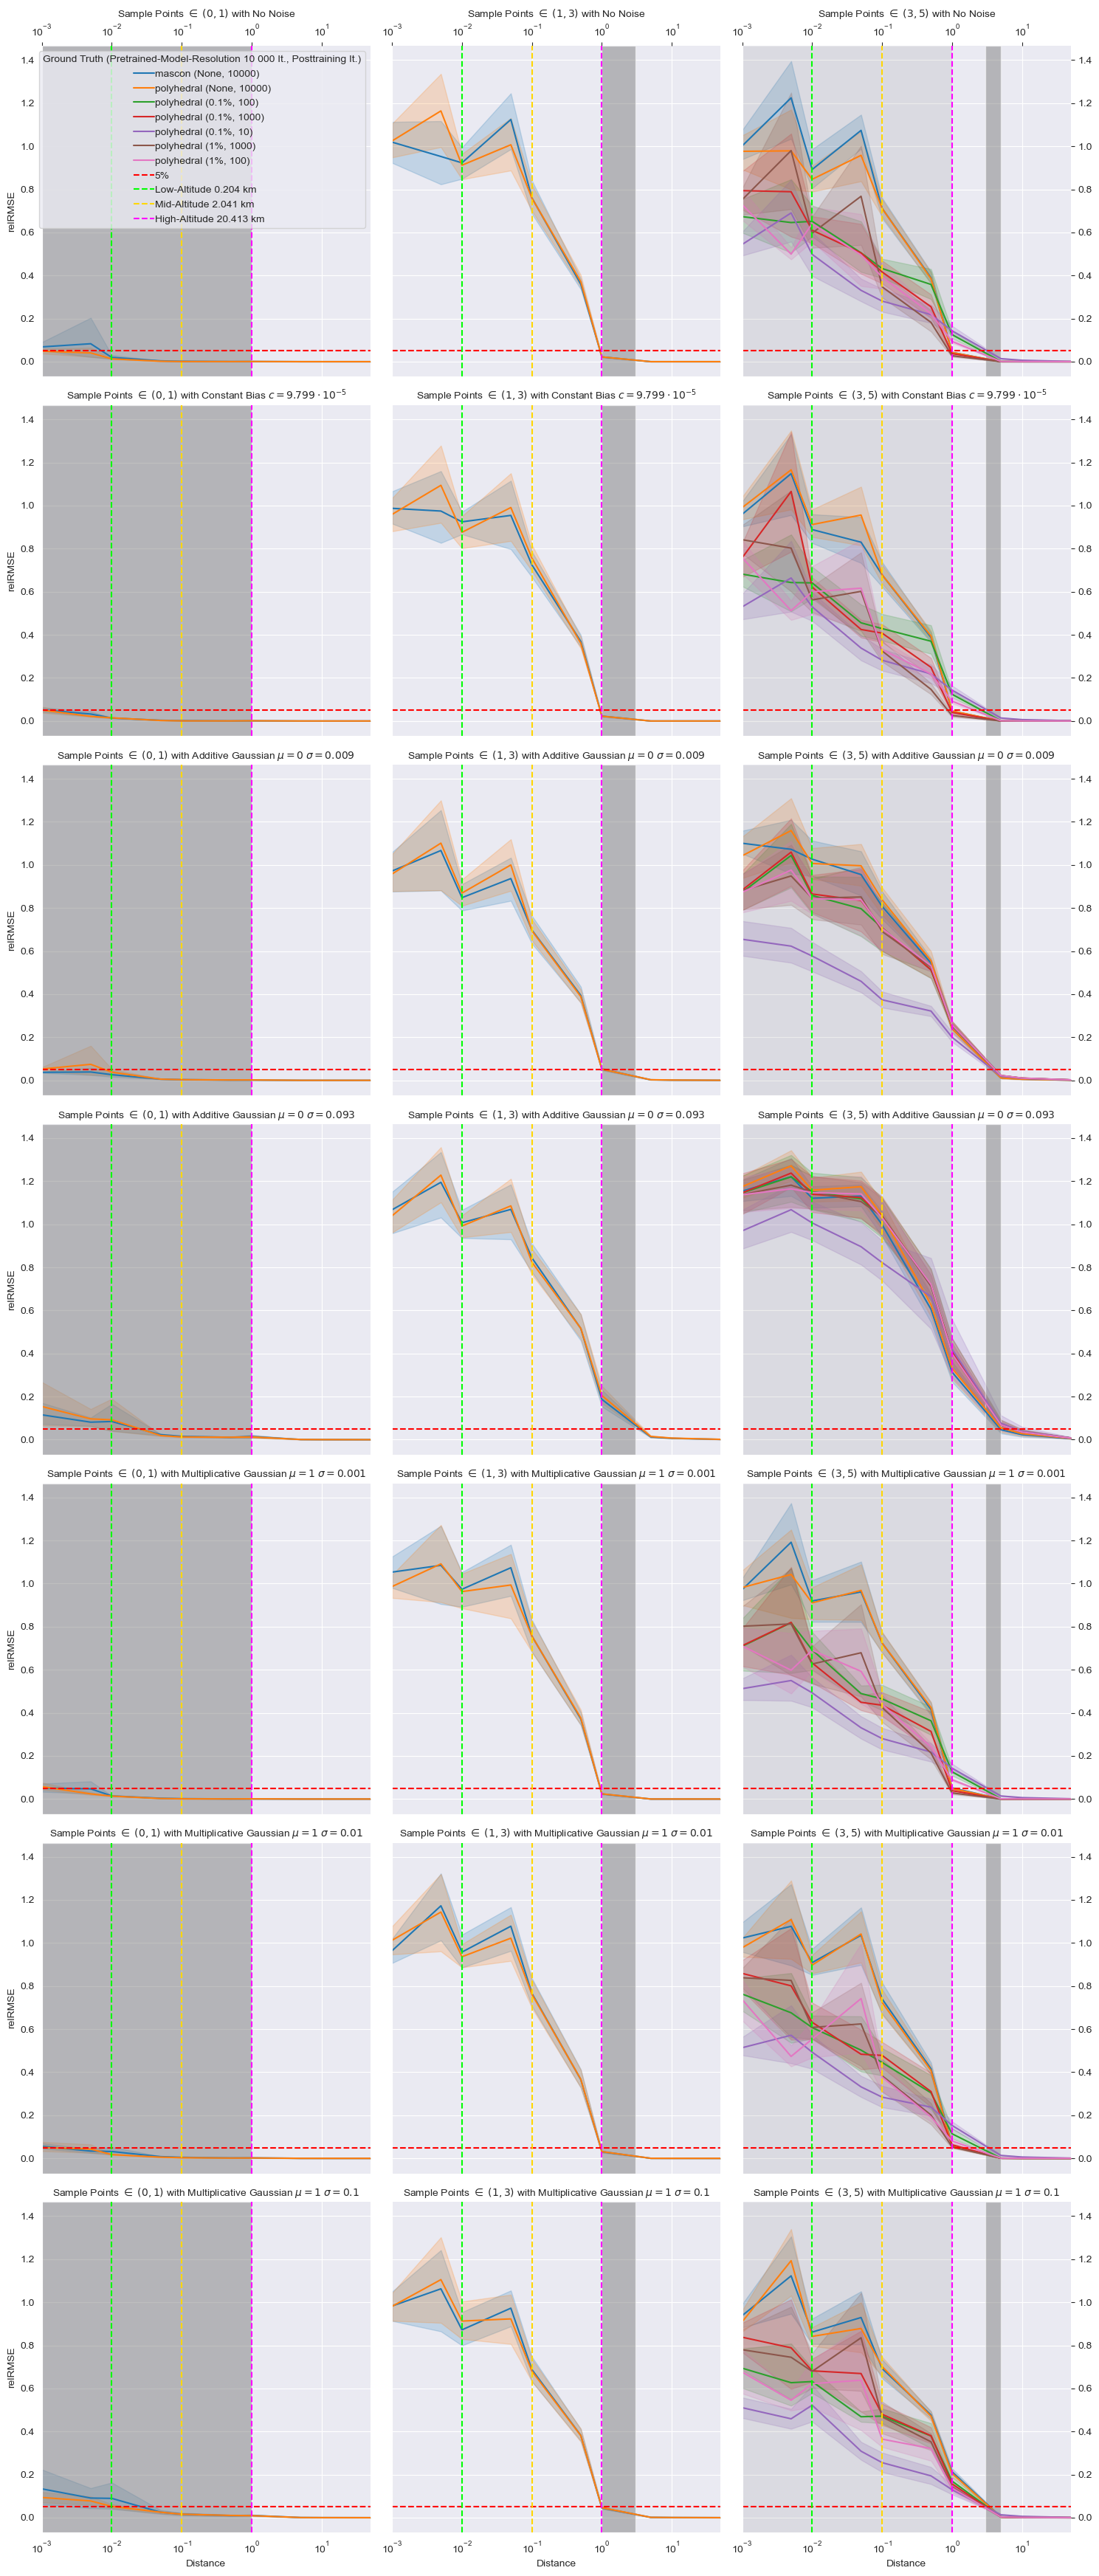

In [27]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest, col="sample_domain", row="noise",
    col_order=sorted(sample_distance_replacement.values()),
    row_order=noise_replacement.values(),
    hue="training_type",
    facet_kws=dict(legend_out=False)
)

g.set_titles("Sample Points $\in$ {col_name} with {row_name}")


g.set(xlim=(0.0, 50.0), xscale='log')#, yscale='log')
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")

g.map(plt.axvline, x=0.01, ls='--', c='lime', label="Low-Altitude 0.204 km")
g.map(plt.axvline, x=0.1, ls='--', c='gold', label="Mid-Altitude 2.041 km")
g.map(plt.axvline, x=1.0, ls='--', c='fuchsia', label="High-Altitude 20.413 km")

for ax in g.axes[0,:]:
    ax.tick_params(top=True, labeltop=True, labelrotation=0)
    ax.set_xlabel("Distance")
    ax.xaxis.set_label_position('top')
for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,1]:
    ax.axvspan(1.0, 3.0, facecolor='gray', alpha=0.5)
for ax in g.axes[:,2]:
    ax.axvspan(3.0, 5.0, facecolor='gray', alpha=0.5)
    ax.axvspan(0.0, 1.0, facecolor='gray', alpha=0.15)
    ax.tick_params(right=True, labelright=True, labelrotation=0)

g.legend.remove()
g.add_legend(handletextpad=0.1, title="Ground Truth (Pretrained-Model-Resolution 10 000 It., Posttraining It.)")
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

## Analysis of the pretraining results


In [28]:
df = df_copy.copy()

# Select from df where pretrained_model is None, and sample_domain is [0.0, 1.0], and noise is ['']
df = df.loc[(df["ground_truth"] == "polyhedral") & (df["sample_domain"] == "[0.0, 1.0]") & (df["noise"] == "['']")]

df = df[interesting_columns]

In [29]:
unit_conversion.convert_pandas_altitudes(df, ALTITUDES, convert_height=False, only_height=True)

,sample,pretrained_model,seed,ground_truth,resolution,sample_domain,noise,iterations,integration_points,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
30,eros,None,99,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.026492,0.016464,0.013248,0.001647,0.000475,0.000321,0.000759,0.000014,0.000004,6.254906e-07
66,eros,None,37,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.049035,0.018149,0.014139,0.001595,0.000408,0.000116,0.000150,0.000011,0.000006,1.263797e-06
102,eros,None,7,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.088319,0.069985,0.013704,0.001602,0.000376,0.000154,0.000422,0.000010,0.000005,1.105844e-06
138,eros,None,9,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.024036,0.017404,0.012690,0.002119,0.000537,0.000289,0.000442,0.000013,0.000005,1.058467e-06
174,eros,None,2023,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.069076,0.017057,0.011930,0.001498,0.000345,0.000106,0.000144,0.000003,0.000001,5.171477e-07
246,eros,None,1999,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.035974,0.018831,0.011222,0.001404,0.000337,0.000112,0.000275,0.000013,0.000006,1.384225e-06
282,eros,None,67,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.046906,0.017346,0.011059,0.001579,0.000398,0.000131,0.000173,0.000014,0.000007,1.576335e-06
354,eros,None,433,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.063191,0.017912,0.011580,0.001499,0.000379,0.000159,0.000593,0.000008,0.000003,7.139857e-07
390,eros,None,42,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.029103,0.078119,0.012531,0.002017,0.000550,0.000430,0.000337,0.000014,0.000006,1.123146e-06
426,eros,None,3,polyhedral,100%,"[0.0, 1.0]",[''],10000,300000,0.053544,0.135311,0.017821,0.003646,0.001197,0.001455,0.003135,0.000059,0.000025,4.725599e-06


In [30]:
df.drop(columns=["sample", "iterations", "seed", "integration_points"], inplace=True)
df.groupby(["resolution"]).mean()

,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0
resolution,,,,,,,,,,
0.1%,0.497257,0.701188,0.473811,0.214738,0.159189,0.051414,0.024922,0.004481,0.002274,0.000468
1%,0.112783,0.160101,0.089842,0.068317,0.056218,0.022898,0.011554,0.001968,0.000996,0.000206
10%,0.050508,0.029280,0.014831,0.004254,0.002902,0.001058,0.000949,0.000085,0.000040,0.000008
100%,0.048568,0.040658,0.012992,0.001861,0.000500,0.000327,0.000643,0.000016,0.000007,0.000001


In [31]:
str_altitudes = [str(x) for x in ALTITUDES]

dfm = df.melt(["resolution"], str_altitudes, var_name="Distance", value_name=error_of_interest)

dfm["Distance"] = dfm["Distance"].apply(lambda x: float(x))
dfm[error_of_interest] = dfm[error_of_interest].apply(lambda x: float(x))

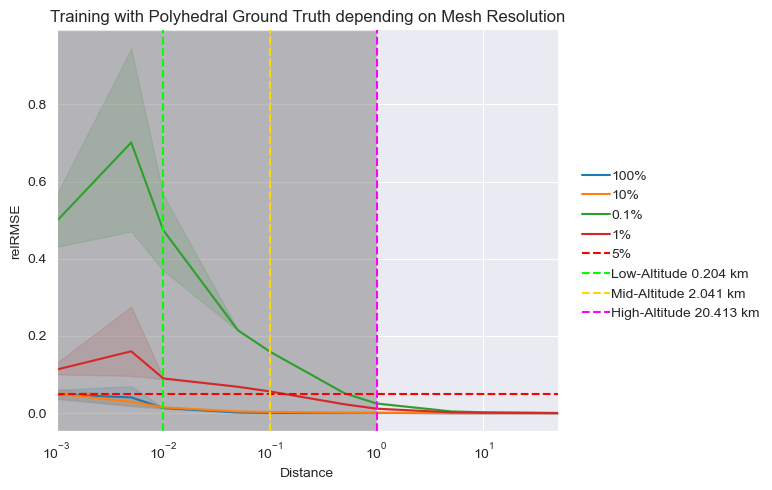

In [32]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest,
    hue="resolution"
)
g.set(xlim=(0.001, 50.0), xscale='log',
      title="Training with Polyhedral Ground Truth depending on Mesh Resolution")
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.01, ls='--', c='lime', label="Low-Altitude 0.204 km")
g.map(plt.axvline, x=0.1, ls='--', c='gold', label="Mid-Altitude 2.041 km")
g.map(plt.axvline, x=1.0, ls='--', c='fuchsia', label="High-Altitude 20.413 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_mesh_resolution_comparison_norm_{error_of_interest}_line.png")
g.savefig(save_path, dpi=300)

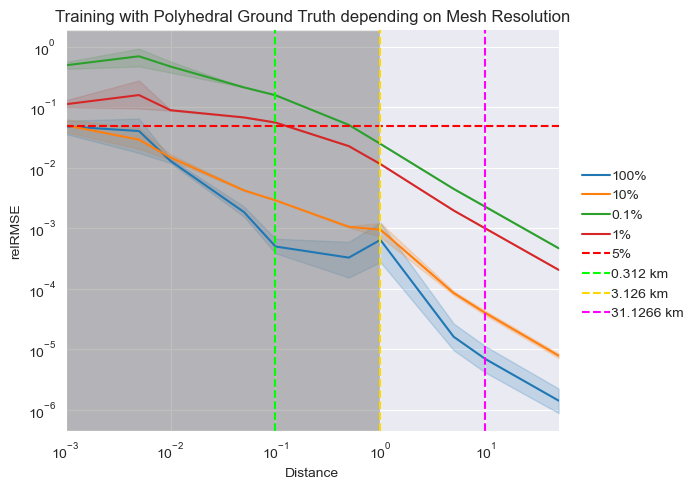

In [33]:
g = sns.relplot(
    data=dfm, kind="line",
    x="Distance", y=error_of_interest,
    hue="resolution"
)
g.set(xlim=(0.001, 50.0), xscale='log', yscale='log',
      title="Training with Polyhedral Ground Truth depending on Mesh Resolution")
g.map(plt.axhline, y=0.05, ls='--', c='red', label="5%")
g.map(plt.axvline, x=0.1, ls='--', c='lime', label="0.312 km")
g.map(plt.axvline, x=1.0, ls='--', c='gold', label="3.126 km")
g.map(plt.axvline, x=10.0, ls='--', c='fuchsia', label="31.1266 km")

for ax in g.axes[:,0]:
    ax.axvspan(0, 1.0, facecolor='gray', alpha=0.5)

g.legend.remove()
g.add_legend(handletextpad=0.1)
g.tight_layout()
save_path = os.path.join(output_directory, f"{sample}_mesh_resolution_comparison_norm_{error_of_interest}_log_line.png")
g.savefig(save_path, dpi=300)